In [1]:
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm
pd.options.display.max_columns = None

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='cp1252')
engage = pd.read_csv('takehome_user_engagement.csv', encoding='cp1252')

In [26]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [27]:
users.fillna(0,inplace=True)

In [28]:
users.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [29]:
engage.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [4]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
# Convert time_stamp to datetime
from datetime import datetime, timedelta
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])

In [7]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
# Create dataframe with time_stamp as index
df = engage.set_index('time_stamp')
# Resample time_stamp by weekly intervals and grouped by user_id then sum then number of visits each week
df_cnt = df.groupby('user_id').resample('W').visited.sum()

In [18]:
# Create list with maximum number of logins within a 1-week period
max_logins_week = np.zeros(len(engage.user_id.unique()))
for i,uid in enumerate(engage.user_id.unique()):
    max_logins_week[i] = df_cnt[uid].max()

In [19]:
# Create a dataframe containing user_id and the max number of logins(max_logins_week)
dat = list(zip(engage.user_id.unique(),np.zeros(len(engage.user_id.unique()))))
uid_list = pd.DataFrame(dat,columns=['userid','max_logins_week'])
uid_list['max_logins_week'] = max_logins_week
# Create list indicating if user is an "adoptive user"
adoptive_user = [1 if logins >= 3 else 0 for logins in uid_list.max_logins_week]
# combine to list with user_id
uid_list['adoptive_user'] = adoptive_user

In [20]:
uid_list.head()

,userid,max_logins_week,adoptive_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [43]:
merge_users_adoptive = users.merge(uid_list,how='left', left_on='object_id', right_on='userid').drop(columns=['userid','max_logins_week'])

In [44]:
merge_users_adoptive.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adoptive_user                 3177
dtype: int64

In [45]:
df_final = merge_users_adoptive.fillna(0)

In [46]:
df_final.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adoptive_user                 0
dtype: int64

In [47]:
df_final.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adoptive_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


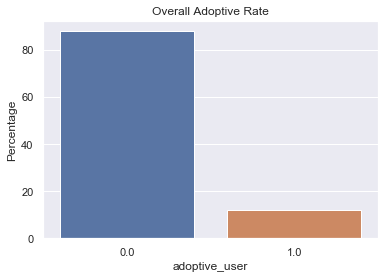

In [55]:
sns.set()
sns.barplot(x='adoptive_user',y='adoptive_user',data=df_final, estimator=lambda x: len(x) / len(df_final) * 100,orient="v")
plt.ylabel('Percentage')
plt.title('Overall Adoptive Rate')
plt.show()

In [56]:
guest = df_final[df_final.creation_source == 'GUEST_INVITE']
org = df_final[df_final.creation_source == 'ORG_INVITE']
signup = df_final[df_final.creation_source == 'SIGNUP']
personal = df_final[df_final.creation_source == 'PERSONAL_PROJECTS']
google = df_final[df_final.creation_source == 'SIGNUP_GOOGLE_AUTH']
mail_list = df_final[df_final.opted_in_to_mailing_list == 1]
no_mail_list = df_final[df_final.opted_in_to_mailing_list == 0]
marketing_drip = df_final[df_final.enabled_for_marketing_drip == 1]
no_marketing_drip = df_final[df_final.enabled_for_marketing_drip == 0]

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


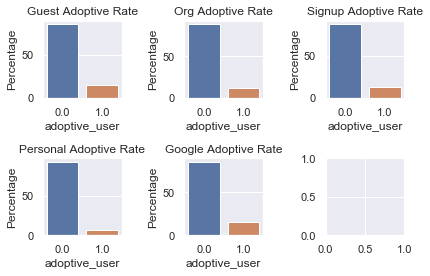

In [58]:
sns.set()
f, axes = plt.subplots(2, 3)
sns.barplot(x='adoptive_user',y='adoptive_user',data=guest, estimator=lambda x: len(x) / len(guest) * 100,orient="v",ax=axes[0][0]).set(ylabel='Percentage',title='Guest Adoptive Rate')
sns.barplot(x='adoptive_user',y='adoptive_user',data=org, estimator=lambda x: len(x) / len(org) * 100,orient="v",ax=axes[0][1]).set(ylabel='Percentage',title='Org Adoptive Rate')
sns.barplot(x='adoptive_user',y='adoptive_user',data=signup, estimator=lambda x: len(x) / len(signup) * 100,orient="v",ax=axes[0][2]).set(ylabel='Percentage',title='Signup Adoptive Rate')
sns.barplot(x='adoptive_user',y='adoptive_user',data=personal, estimator=lambda x: len(x) / len(personal) * 100,orient="v",ax=axes[1][0]).set(ylabel='Percentage',title='Personal Adoptive Rate')
sns.barplot(x='adoptive_user',y='adoptive_user',data=google, estimator=lambda x: len(x) / len(google) * 100,orient="v",ax=axes[1][1]).set(ylabel='Percentage',title='Google Adoptive Rate')
plt.tight_layout()
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


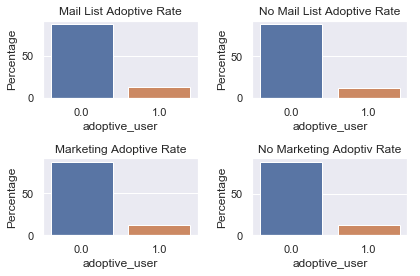

In [57]:
sns.set()
f, axes = plt.subplots(2, 2)
sns.barplot(x='adoptive_user',y='adoptive_user',data=mail_list, estimator=lambda x: len(x) / len(mail_list) * 100,orient="v",ax=axes[0][0]).set(ylabel='Percentage',title='Mail List Adoptive Rate')
sns.barplot(x='adoptive_user',y='adoptive_user',data=no_mail_list, estimator=lambda x: len(x) / len(no_mail_list) * 100,orient="v",ax=axes[0][1]).set(ylabel='Percentage',title='No Mail List Adoptive Rate')
sns.barplot(x='adoptive_user',y='adoptive_user',data=marketing_drip, estimator=lambda x: len(x) / len(marketing_drip) * 100,orient="v",ax=axes[1][0]).set(ylabel='Percentage',title='Marketing Adoptive Rate')
sns.barplot(x='adoptive_user',y='adoptive_user',data=no_marketing_drip, estimator=lambda x: len(x) / len(no_marketing_drip) * 100,orient="v",ax=axes[1][1]).set(ylabel='Percentage',title='No Marketing Adoptive Rate')
plt.tight_layout()
plt.show()

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\regru\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\regru\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\regru\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


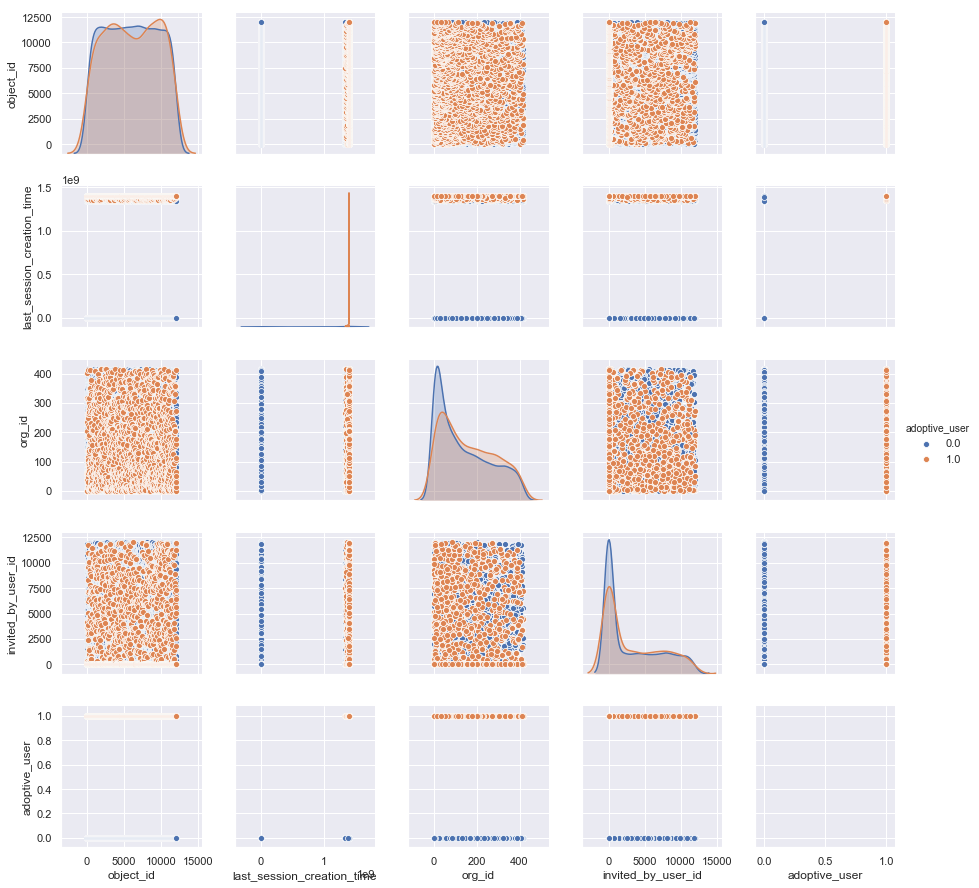

In [64]:
sns.set(font_scale = 1)
sns.pairplot(df_final.drop(columns=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip']), hue='adoptive_user')
plt.show()

In [53]:
len(df_final.invited_by_user_id.unique())

2565